# $DIABETES$

Diabetes is a condition in which the amount of glucose (sugar) in your blood is too high because your body cannot use it properly. This happens because your body either cannot use or make a hormone called insulin, which is responsible for turning sugar into food for your body's cells.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

>Reading our csv file that contains about 9 columns and 768 rows

In [3]:
data=pd.read_csv('diabetes.csv')

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,90,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Overview of dataset

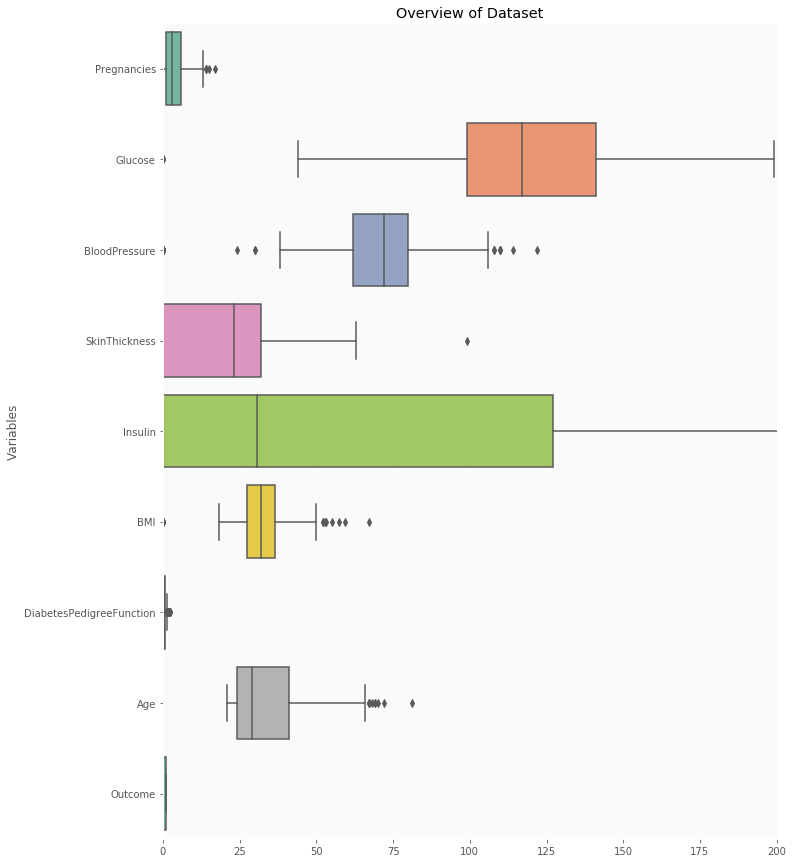

In [6]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview of Dataset")
ax = sns.boxplot(data = data, orient = 'h',palette = 'Set2')

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.858073,69.128906,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,32.032813,19.370209,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

>No missing values. <br> but we have to replace Blood Pressure,skin thickness,insulin,bmi,age from 0 to NAN.<br>
 Not changing Pregnancies and Outcome variable because 0 is a valid answer for both of them

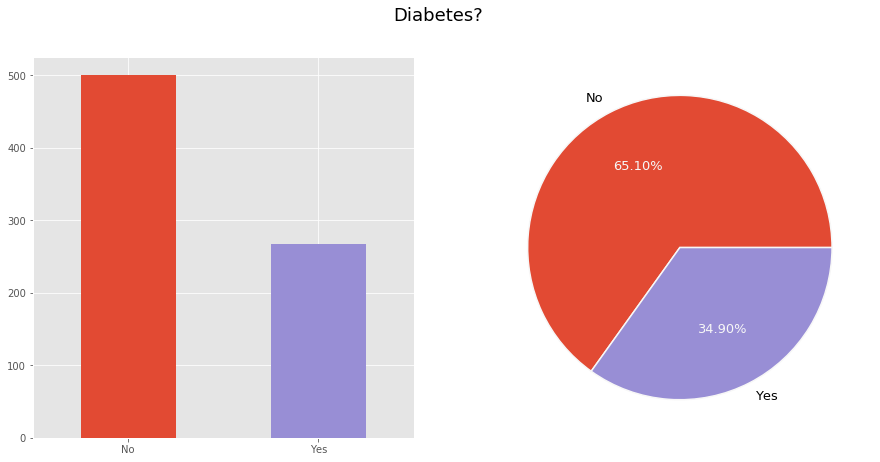

In [9]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

# correlation 

The Correlation Coefficient value can range from -1 to 1. If the correlation between two variables is -1, they are both highly negatively correlated, whereas if the correlation between two variables is +1, they both are highly positively correlated. A correlation coefficient of 0 indicated that there is no correlation between the two variables.

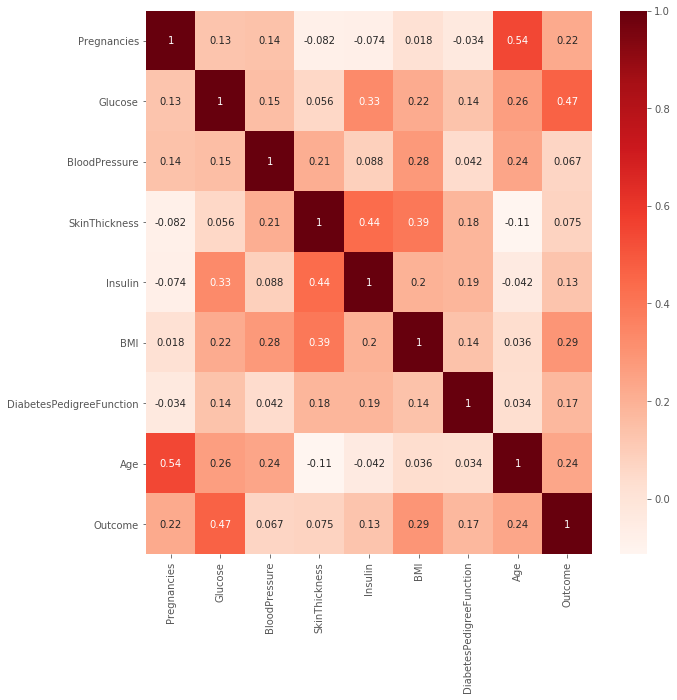

In [10]:
m=data.loc[:,data.columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(m,annot=True,cmap="Reds")

# The following observations can be made:<BR>
**Correlation between few columns.**<BR>
Age is highly correlated with Pregnancies.<BR>
Insulin is highly correlated with skinthickness.<BR>
Insulin surprisingly correlates more with SkinThickness than with Outcome.<BR>
This could be due to the fact since high body fat is known to cause increased insulin resistance which leads to the pancreas to release more insulin.Increased SkinThickness leads to increased body fat.<BR>
Also skinthickness is correlated with BMI.<BR>
Glucose and Insulin, Pregnancies and Age, SkinThickness and BMI have relatively high values.<BR>
DiabetesPedigreeFunction, in particular, appears to have little correlation with other variables.<BR>

>Glucose has the highest correlation with Outcome and BloodPressure has the lowest

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198BCEE8438>,
      dtype=object)

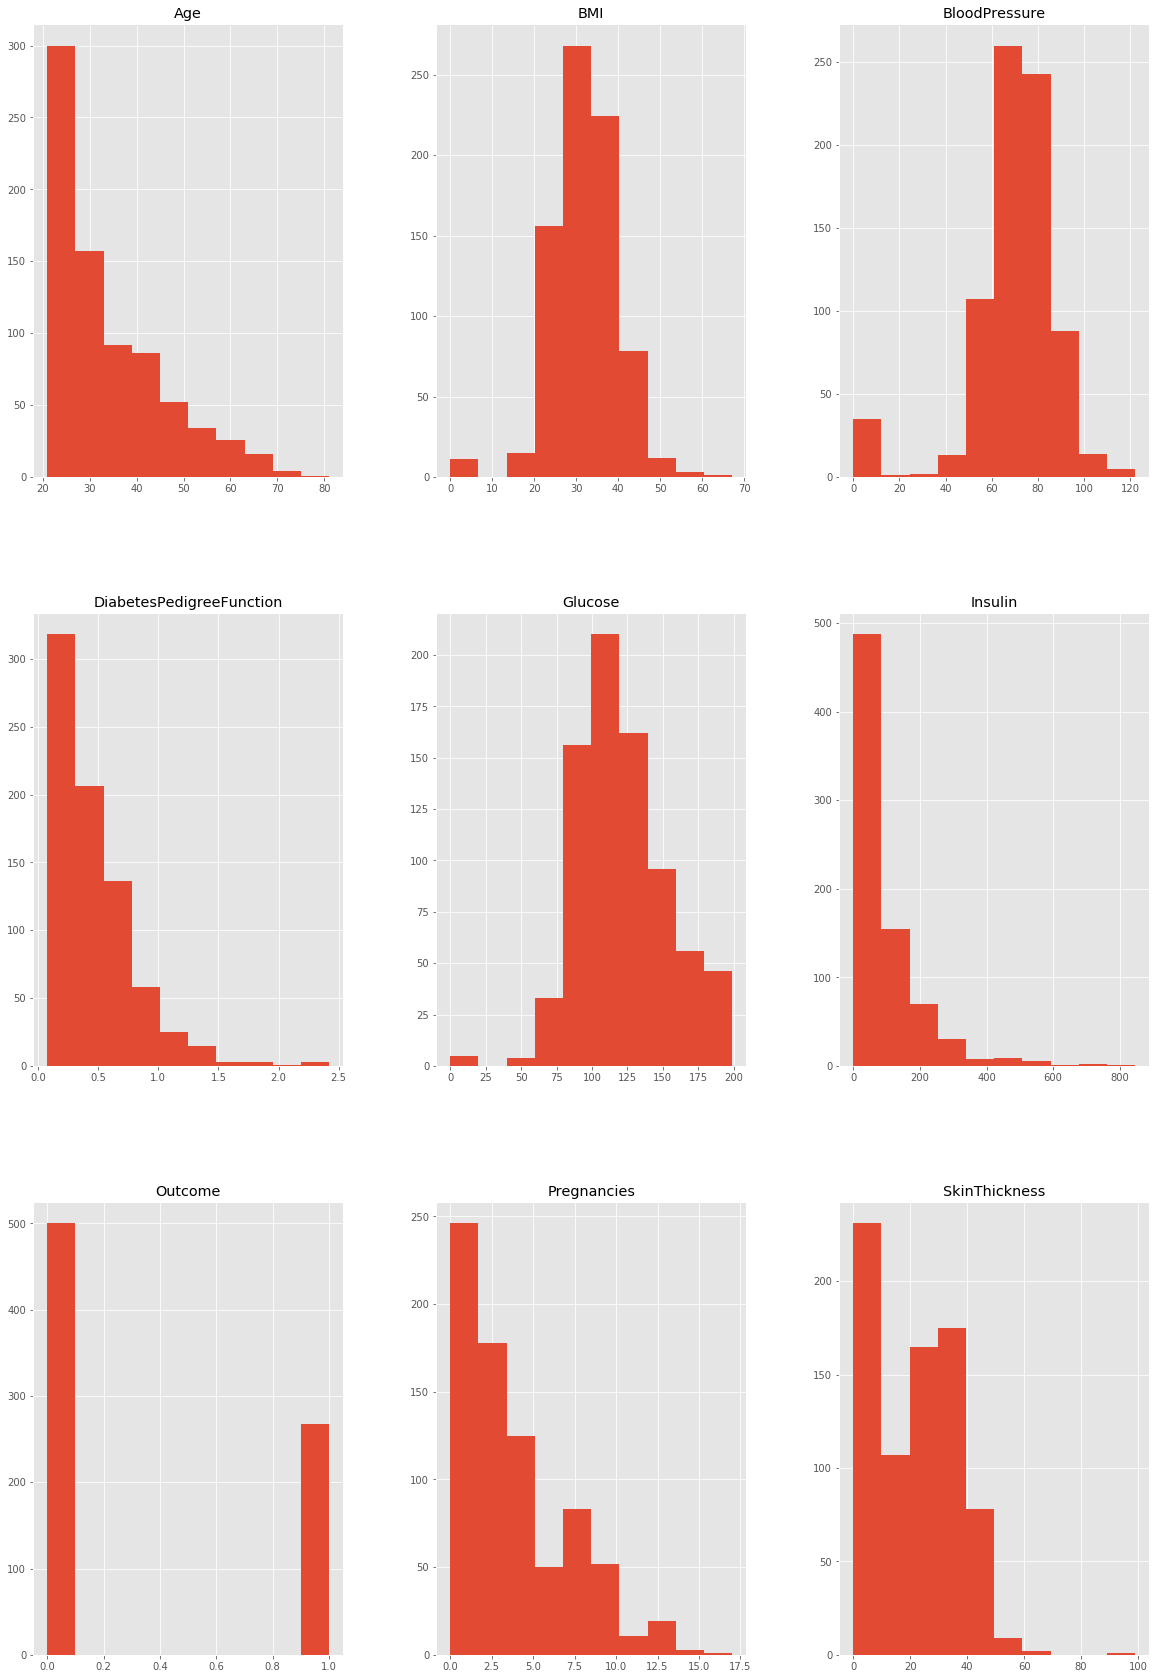

In [11]:
data.hist(figsize=(20,30))
#Attributes BMI, BloodPressure, Glucose are found to be normally distributed.
#Age, DiabetesPedigreeFunction, Insulin, Pregnancies found to be exponentially distributed

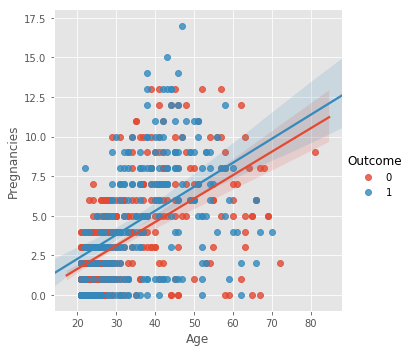

In [12]:
sns.lmplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
#age and preg.. related

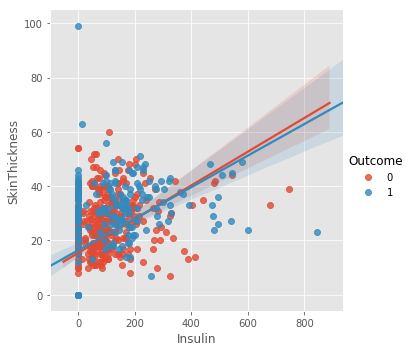

In [13]:
sns.lmplot(x='Insulin',y='SkinThickness',hue='Outcome',data=data)
#related

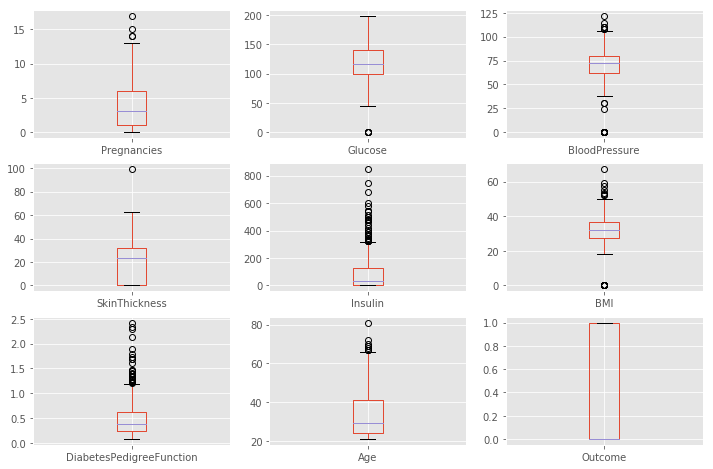

In [14]:
#Boxplot of each column
data.plot(kind='box', figsize=(12, 8), subplots=True, layout=(3, 3))
plt.show()

In [15]:
data['Glucose'] = data['Glucose'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan) 
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan) 
data['Insulin'] = data['Insulin'].replace(0, np.nan)        
data['BMI'] = data['BMI'].replace(0, np.nan) 
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0, np.nan) 
data['Age'] = data['Age'].replace(0, np.nan) 

In [16]:
data.isnull().sum()
#now we have found out that there are many missing values...

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,90.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


filling missing values with median
<BR>Imputation is the process of replacing missing data with substituted values.

In [18]:
data['BMI'].fillna(data['BMI'].median(), inplace=True)
data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)

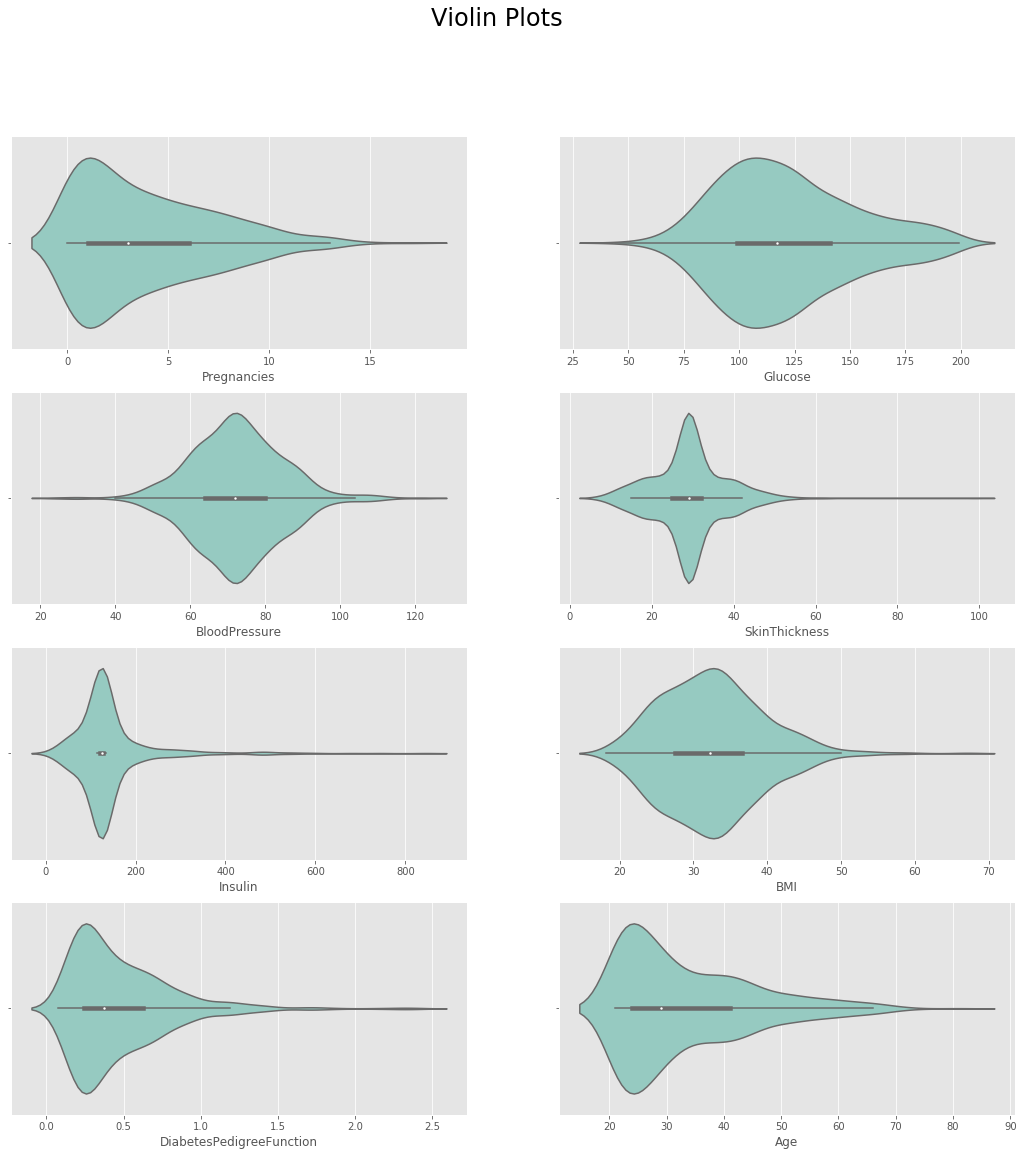

In [19]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=data,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=data,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=data, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=data, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=data, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=data, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DiabetesPedigreeFunction', data=data, ax=ax[3,0],palette='Set3')
sns.violinplot(x='Age', data=data, ax=ax[3,1],palette='Set3')
plt.show()

In [20]:
bin_data2= data.groupby("Age")[["Outcome"]].count()
bin_data2["% Diabetic"] = (bin_data2["Outcome"]/bin_data2["Outcome"])*100

In [21]:
bins = np.arange(min(data["Glucose"]),max(data["Glucose"]),10)
bins

array([ 44.,  54.,  64.,  74.,  84.,  94., 104., 114., 124., 134., 144.,
       154., 164., 174., 184., 194.])

In [22]:
data["Glucose Level"] = pd.cut(data["Glucose"], bins=bins)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose Level
0,6,148.0,90.0,35.0,125.0,33.6,0.627,50,1,"(144.0, 154.0]"
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,"(84.0, 94.0]"
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,"(174.0, 184.0]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(84.0, 94.0]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(134.0, 144.0]"
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,"(114.0, 124.0]"
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,"(74.0, 84.0]"
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0,"(114.0, 124.0]"
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,NaN
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1,"(124.0, 134.0]"


In [23]:
bindata1 = data[data["Outcome"]==1].groupby("Glucose Level")[["Outcome"]].count()
bindata = data.groupby("Glucose Level")[["Outcome"]].count()
bindata1["% Diabetic"] = (bindata1["Outcome"]/bindata["Outcome"])*100

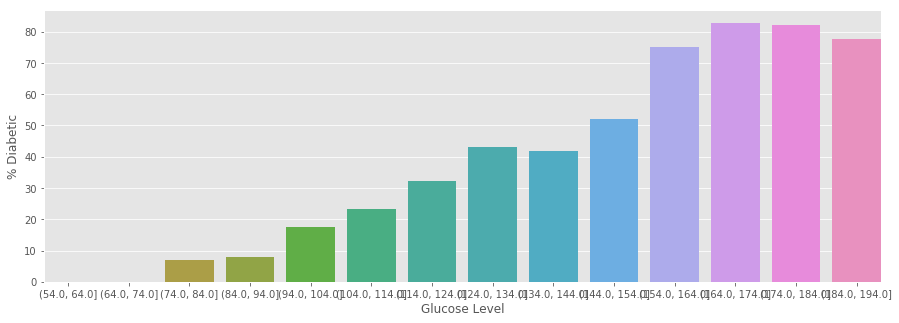

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x=bindata1.index, y=bindata1["% Diabetic"])
plt.autoscale(enable=True, axis='x', tight=True)

*Higher the Glucose Levels higher the chance of testing Diabetes.*

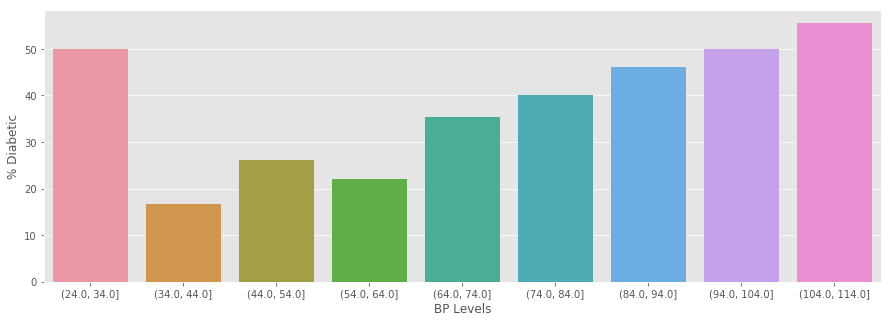

In [25]:
bins = np.arange(min(data["BloodPressure"]),max(data["BloodPressure"]),10)
data["BP Levels"] = pd.cut(data["BloodPressure"], bins=bins)
bindata1 = data[data["Outcome"]==1].groupby("BP Levels")[["Outcome"]].count()
bindata = data.groupby("BP Levels")[["Outcome"]].count()
bindata1["% Diabetic"] = (bindata1["Outcome"]/bindata["Outcome"])*100
plt.figure(figsize=(15,5))
sns.barplot(x=bindata1.index, y=bindata1["% Diabetic"])

**Can hypertension cause diabetes?** <BR>
A meta-analysis appearing in the Journal of the American College of Cardiology (JACC) in 2015 looked at data for more than 4 million adults. It concluded that people with high blood pressure have a higher risk of developing type 2 diabetes.

Having diabetes raises your risk of heart disease, stroke, kidney disease and other health problems.<BR> Having high blood pressure also raises this risk. If you have diabetes and high blood pressure together, this raises your risk of health problems even more.
blood pressure level have a great effect on diabetes. When a diabetic person visit a doctor, they will measure their blood pressure. This means that they will probably want their blood pressure to be below 130 over 80.

Hypertension and diabetes often occur together, and they appear to share some risk factors and causes.
Lifestyle adjustments can help control blood pressure and blood sugar levels, but most people will need to follow a treatment plan for life.

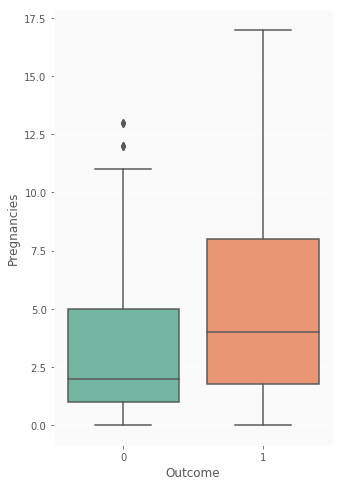

In [26]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(5,8))
ax.set_facecolor('#fafafa')
ax.set(xlim=(0,1))
ax = sns.boxplot(x='Outcome',y='Pregnancies',data = data,palette = 'Set2')


We can see that most females have 0-2 babies.<BR>
INTERPRETATION-Higher the number of pregnancies, more is the risk of having diabetes.

**what's the effect of BMI on the Outcome???**

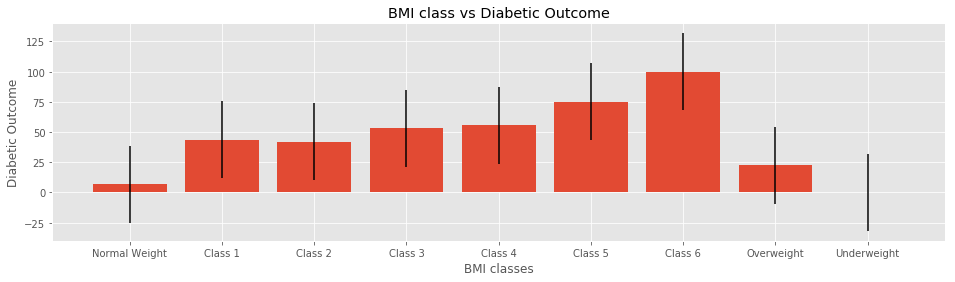

In [27]:
def get_bmi_groups(bmi):
    if bmi >= 16 and bmi <18.5:
        return "Underweight"
    elif bmi >= 18.5 and bmi < 25 :
        return "Normal weight"
    elif bmi >= 25 and bmi < 30:
        return "Overweight"
    elif bmi >= 30 and bmi < 35:
        return "Obese Class I (Moderately obese)"
    elif bmi >= 35 and bmi < 40:
        return "Obese Class II (Severely obese)"
    elif bmi >= 40 and bmi < 45:
        return "Obese Class III (Very severely obese)"
    elif bmi >= 45 and bmi < 50:
        return "Obese Class IV (Morbidly Obese)"
    elif bmi >= 50 and bmi < 60:
        return "Obese Class V (Super Obese)"
    elif bmi >= 60:
        return "Obese Class VI (Hyper Obese)"


data['bmi_groups'] = data['BMI'].apply(get_bmi_groups)

bmi_groups_groupby = data.groupby(['bmi_groups'])
bmi_groups_groupby_count = bmi_groups_groupby.count()['Outcome']
bmi_groups_groupby_sum = bmi_groups_groupby.sum()['Outcome']
bmi_groups_groupby_percentage = bmi_groups_groupby_sum / bmi_groups_groupby_count * 100
plt.figure(figsize=(16,4))
plt.bar(x=range(0,9), height=bmi_groups_groupby_percentage, yerr=bmi_groups_groupby_percentage.std(), tick_label=["Normal Weight", "Class 1", "Class 2","Class 3", "Class 4", "Class 5", "Class 6", "Overweight", "Underweight"])
plt.title("BMI class vs Diabetic Outcome")
plt.xlabel("BMI classes")
plt.ylabel("Diabetic Outcome")
plt.show()


> INTERPRETATION- people have BMI range of CLASS 6 than other classes

In [28]:
data['level'] = data['Glucose'].apply(lambda value: 'normal' 
                                                          if value <= 100 else 'prediabetic' 
                                                              if value <= 126 else 'high diabetic')

In [29]:
num1=data[data['level']=='prediabetic'].count()

In [30]:
p2=num1/768
p2[0]

0.3515625

In [31]:
num2=data[data['level']=='normal'].count()

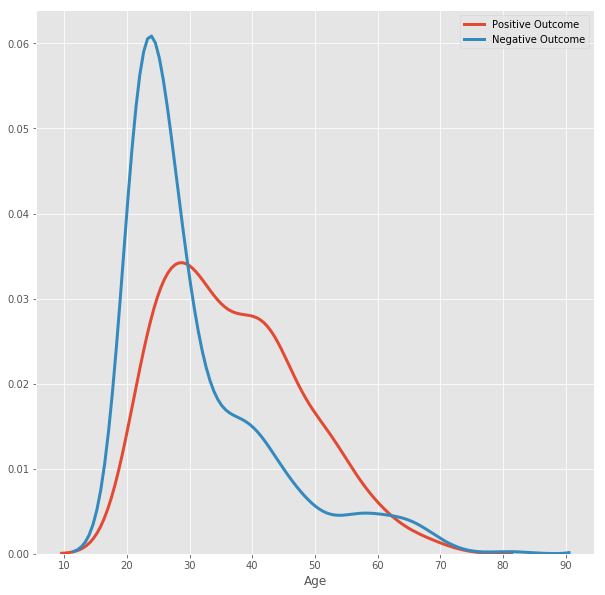

In [32]:
positive = data[data['Outcome']==1]
negative = data[data['Outcome']==0]
plt.subplots(figsize = (10,10))
sns.distplot(positive['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Positive Outcome')
sns.distplot(negative['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Negative Outcome')
plt.show()
#As we can see in most of the cases Diabetes starts to affect predominantly in middle age, around 30.

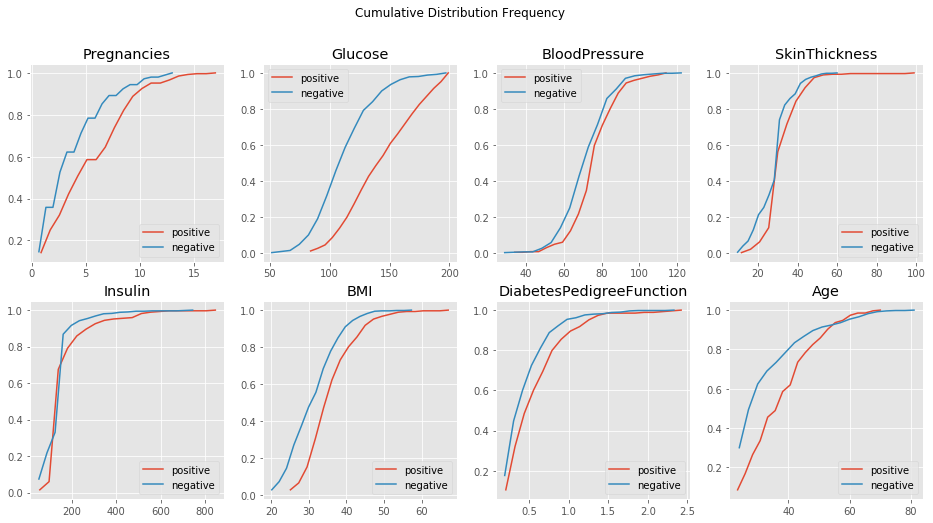

In [33]:
f,axes = plt.subplots(2,4,figsize=(16,8))
count=0
for i in range(2):
    for j in range(4):
        axes[i][j].set_title(data.columns[count])
        counts,bins = np.histogram(positive.iloc[:,count],bins=20)
        cdf = np.cumsum(counts)
        sns.lineplot(bins[1:],cdf/cdf[-1],ax = axes[i][j],label = 'positive')
        counts,bins = np.histogram(negative.iloc[:,count],bins=20)
        cdf = np.cumsum(counts)
        sns.lineplot(bins[1:],cdf/cdf[-1],ax = axes[i][j],label='negative')
        count=count+1
plt.suptitle('Cumulative Distribution Frequency ')
plt.show()


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


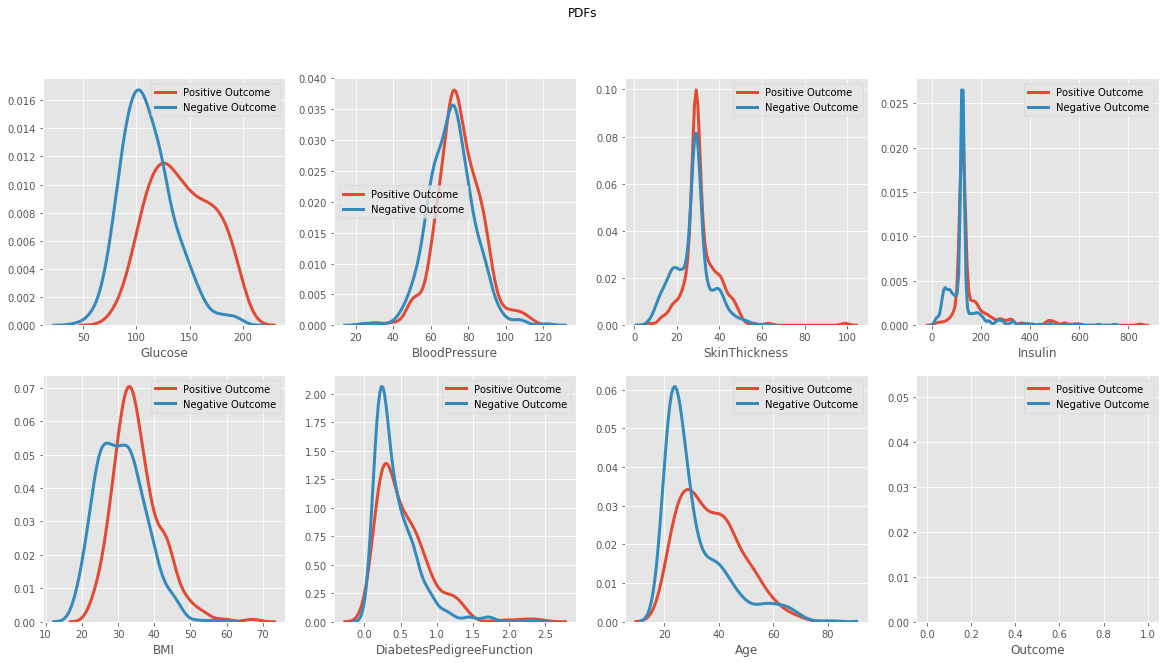

In [34]:
f, axes = plt.subplots(2, 4,figsize=(20,10))
count=0

for i in range(2):
    for j in range(4):
        count=count+1
        sns.distplot(positive.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Positive Outcome',ax = axes[i][j])
        sns.distplot(negative.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Negative Outcome',ax = axes[i][j])
        axes[i][j].legend()
        
f.suptitle('PDFs')
plt.show()
      

In [35]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
data= data.assign(INSULIN_LEVEL=data.apply(set_insulin, axis=1))

In [36]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose Level,BP Levels,bmi_groups,level,INSULIN_LEVEL
0,6,148.0,90.0,35.0,125.0,33.6,0.627,50,1,"(144.0, 154.0]","(84.0, 94.0]",Obese Class I (Moderately obese),high diabetic,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,"(84.0, 94.0]","(64.0, 74.0]",Overweight,normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,"(174.0, 184.0]","(54.0, 64.0]",Normal weight,high diabetic,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(84.0, 94.0]","(64.0, 74.0]",Overweight,normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(134.0, 144.0]","(34.0, 44.0]",Obese Class III (Very severely obese),high diabetic,Abnormal


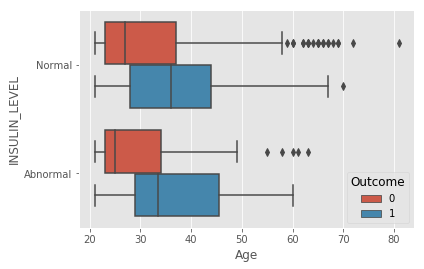

In [37]:
sns.boxplot(x="Age", y="INSULIN_LEVEL", hue="Outcome", data=data);


INTERPRETATION-It can be seen from the above graph that patients having normal insulin levels are more diabetic within the age range from 25 and 42 $where$ $as$ patients having abnormal insulin levels are more diabetic in the age range of late 20's to mid 40's.

In [38]:
data['Age']=data['Age']
bins=[21,30,59,65]
labels=['Young Adult','Middle aged Adult','Old aged Adult']
data['age_grp']=pd.cut(data['Age'],bins,labels=labels)

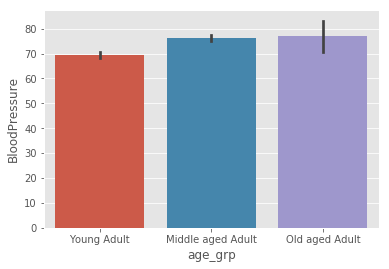

In [39]:
#age_grp - blood_pressure
result = data.groupby(["age_grp"])['BloodPressure'].aggregate(np.median).reset_index().sort_values('BloodPressure')
sns.barplot(x='age_grp', y="BloodPressure", data=data, order=result['age_grp']) 

>INTERPRETATION-blood pressure increases with age mostly because of structural changes in arteries and stiffness associated with it

In [40]:
import thinkplot
import thinkstats2

**$BINOMIAL$ $DISTRIBUTION$**

In [41]:
data[data['Insulin']>126].count()
p1=193/786
p1  #probability of success that the person sufers from high risk
bin1=np.random.binomial(n=786,p=p1,size=int(1e6)) #prob of success given
bin_cdf=thinkstats2.Cdf(bin1)
a=bin_cdf.Prob(200)
1-a # prob of more than 200 people having insulin greater than 126

0.26639599999999997

In [42]:
from scipy import stats

**$NORMAL$ $DISTRIBUTION$**

In [43]:
data['BloodPressure'].mean()

72.41015625

In [44]:
data['BloodPressure'].std()

12.113317677853676

>**diastolic blood pressure:**<br>less than 80 normal<BR>90 or higher is high<BR>higher than 120 is critical

**Q.Find the probability of people having blood pressure 90 mm hg or higher??**

In [45]:
1-stats.norm.cdf(90,loc=69.105,scale=19.356)

0.14018016807112854

**Q.Find the probability of people having normal blood pressure??**

In [46]:
stats.norm.cdf(80,loc=69.105,scale=19.356)

0.7132398480343185

>PMF( PROBABILITY MASS FUNCTION ) of Blood Pressure

In [47]:
pmf=thinkstats2.Pmf(data['BloodPressure'])

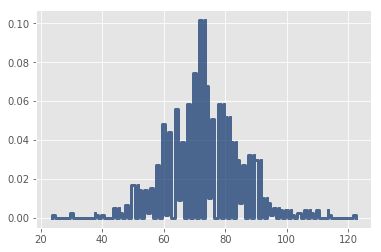

In [48]:
thinkplot.Pmf(pmf)

>CDF (CUMMULATIVE DENSITY FUNCTION ) of Blood Pressure

In [49]:
cdf=thinkstats2.Cdf(data['Pregnancies'])

{'xscale': 'linear', 'yscale': 'linear'}

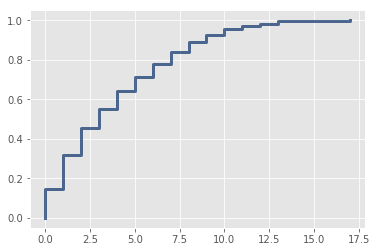

In [50]:
thinkplot.Cdf(cdf)

>**next probability question:-BMI ranges**<BR>
below 18.5 you're in the underweight range.<BR> between 18.5 and 24.9 you're in the healthy <BR> between 25 and 29.9 you're in the overweight range.<BR>30 and above your're obese

In [51]:
data['BMI'].mean()

32.4552083333333

In [52]:
data['BMI'].std()

6.875176818080996

**Q. What percentage of people are under normal range of BMI?**

In [53]:
(stats.norm.cdf(24.9,loc=31.99258,scale=7.88416)-stats.norm.cdf(18.5,loc=31.99258,scale=7.88416))*100

14.065893344461792

**Q. What is the percentage of overweight people?**

In [54]:
(stats.norm.cdf(29.9,loc=31.99258,scale=7.88416)-stats.norm.cdf(25,loc=31.99258,scale=7.88416))*100

20.778228927518782

**Q. What is the percentage of obese people?**

In [55]:
(1-(stats.norm.cdf(30,loc=31.99258,scale=7.88416)))*100

59.97623642677403

In [56]:
data['BMI'].mode()

0    32.3
dtype: float64

#  COVARIANCE AND CORRELATION 

In [57]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.255222,8.553857,2.422243,7.290682,0.499439,-0.037426,21.570620,0.356618
Glucose,13.255222,930.397626,81.423423,51.386646,1102.124104,48.384121,1.375740,95.877886,7.179786
BloodPressure,8.553857,81.423423,146.732465,20.544924,47.034367,23.418004,-0.005892,46.615542,0.971419
SkinThickness,2.422243,51.386646,20.544924,77.285567,118.172405,32.831966,0.297652,13.037818,0.900960
Insulin,7.290682,1102.124104,47.034367,118.172405,7462.033002,107.044997,3.620667,98.643681,8.396268
BMI,0.499439,48.384121,23.418004,32.831966,107.044997,47.268056,0.349522,2.069604,1.023213
DiabetesPedigreeFunction,-0.037426,1.375740,-0.005892,0.297652,3.620667,0.349522,0.109779,0.130772,0.027472
Age,21.570620,95.877886,46.615542,13.037818,98.643681,2.069604,0.130772,138.303046,1.336953
Outcome,0.356618,7.179786,0.971419,0.900960,8.396268,1.023213,0.027472,1.336953,0.227483


In [58]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128967,0.209567,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128967,1.000000,0.220370,0.191631,0.418281,0.230720,0.136127,0.267281,0.493518
BloodPressure,0.209567,0.220370,1.000000,0.192927,0.044949,0.281192,-0.001468,0.327229,0.168139
SkinThickness,0.081770,0.191631,0.192927,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.418281,0.044949,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.230720,0.281192,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.136127,-0.001468,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.267281,0.327229,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.493518,0.168139,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


# CONFIDENCE INTERVAL

**QUESTION:-**
A random sample of 20 females was selected as a part of study on diabetes and their BMI was measured. The average BMI level for the sample  was found to be 32 and standard deviation of 4.45. Assuming bmi to be normally distributed construct 97% ci for mean BMI.

In [62]:
mu=data['BMI'].sample(n=20).mean()
st=data['BMI'].sample(n=20).std()
SE = st/np.sqrt(20)
print("CI using scipy: ",stats.t.interval(0.97, 19,mu, scale=SE))
#CAN BE FOUND SIMILARLY FOR OTHER COLUMNS

CI using scipy:  (32.759135911874125, 38.69086408812586)


**QUESTION:-**
A random sample of 40 females was selected as a part of study on diabetes and their glucose level was measured. The average glucose for the sample  was found to be 128 and standard deviation of 29 . Assuming glucose to be normally distributed in the sample,construct 95% ci for mean BMI. <BR>NOTE: Z stats will be used since n>30, even if population variance is unknown

In [63]:
mu=data['Glucose'].sample(n=40).mean()
st=data['Glucose'].sample(n=40).std()
SE = st/np.sqrt(40)
x_low = mu-1.96*SE
x_high = mu+1.96*SE
print("CI=",x_low,x_high)

CI= 108.65536599955718 128.09463400044282


**QUESTION:-**
A random sample of 20 females having diabetes was selected and their insulin level was measured.The population mean equals 80 mg/dL and the standard deviation is 56.The average insulin for the sample was found to be 53 mg/dL and standard deviation of  110.Construct a 90% ci for mean insulin.

In [64]:
mu=80
sample_mean=data['Insulin'].sample(n=20).mean()
st1=data['Insulin'].sample(n=20).std()
SE = 56/np.sqrt(20)
x_low =sample_mean-1.64*SE
x_high = sample_mean+1.64*SE
print("CI=",x_low,x_high)

CI= 124.66395169464192 165.73604830535805


# BAYES THEOREM 
<BR> **P ( H ∣ E ) = P ( E ∣ H ) P ( H) / P ( E )**

**Question** <BR>According to a survey ,people with high blood pressure were found to have around a 50% increased risk of developing type 2 diabetes.
These types of studies lend weight to the advice to take steps to lower your blood pressure if it's high to reduce your risk of diabetes.
_% of population have high blood pressure level when they have diabetes.
What is the probability that a person will have diabetes given that he has high blood pressure level?

In [65]:
pglucose=data[data['Glucose']>130].count()
n=768
p1=pglucose[1]/n
print("Probablity of people with high glucose level is %0.3f"%p1)
poutcome=data[data['Outcome']==1].count()
p2=poutcome[1]/n
print("Probability of people having diabetes is %0.3f"%p2)
v1=0.207    #(v1=prob that people having high blood pressure and diabetes)
v2=v1/p1
print("probability of people who have diabetes given that they have high glucose level %0.3f"%v2)
RV=(v2*p1)/p2
print("probability that a person who have high glucose level given that they have diabetes is %0.3f" %RV)

Probablity of people with high glucose level is 0.327
Probability of people having diabetes is 0.349
probability of people who have diabetes given that they have high glucose level 0.633
probability that a person who have high glucose level given that they have diabetes is 0.593


In [68]:
data['BMI'].sample(n=50).mean()

31.32400000000001

In [69]:
s_mean=data['BMI'].sample(n=20).mean()
standard=data['BMI'].sample(n=20).std()
SE = standard/np.sqrt(20)
z=(s_mean-0)/SE
z

16.371080078928046

# HYPOTHESIS TESTING

**QUESTION-**A researcher thinks that high BMI has a negative effect on diabetes. A sample of 50 people having diabetes have a mean BMI level of 33.3 and std of 6.31.
Test the hypothesis that BMI had effect on diabetes. 
Take significance level to be 0.05.i.e z score =1.9

In [70]:
s_mean=data[data["Outcome"]==1]["BMI"].sample(n=40).mean()
standard=data[data["Outcome"]==1]["BMI"].sample(n=40).std()
SE = standard/np.sqrt(20)
z=(s_mean)/SE
if(z<1.96):
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis


## Glucose of a person

In [71]:
mu=126
t, p = stats.ttest_1samp(data['Glucose'].sample(n=20), mu)
print("t = ", t, ", p = ", p)
if(p<0.05):
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

t =  -0.6644123914710138 , p =  0.5144098225301865
fail to reject null hypothesis


# CHI SQUARED TEST FOR INDEPENDENCE

A random sample of women is surveyed and the relationship between skin thickening and bp is studied. The data that resulted from the survey is summarised. 
Is there enough evidence to say that they are dependent at 5% level of significance?

In [72]:
a=data['BMI'].head(20)
b=data['Age'].head(20)
from scipy.stats import chi2_contingency
table=pd.crosstab(a,b)
chi2,p,dof,expected=chi2_contingency(table.values)
print('p value %0.3f and alpha %0.3f' %(p,0.05))
if(p<0.05):
    print('reject H^0')
else:
    print('fail to reject H^0')

p value 0.273 and alpha 0.050
fail to reject H^0
